In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import socket
from scipy.stats import pearsonr 
from sklearn.metrics import jaccard_score



### importing abuse report data

In [2]:
data = pd.read_csv("merge_result.csv")
data.head(20)

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544164/,lrz_security,17488
3,3,544162,9/17/2020 10:10,http://115.98.145.51:60363/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544162/,lrz_security,17488
4,4,544161,9/17/2020 10:10,http://115.97.80.186:42284/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544161/,lrz_security,17488
5,5,544160,9/17/2020 10:10,http://115.98.102.230:45653/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544160/,lrz_security,17488
6,6,544159,9/17/2020 10:09,http://115.97.196.195:48233/Mozi.a,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544159/,lrz_security,17488
7,7,544158,9/17/2020 10:09,http://115.97.31.62:41424/Mozi.a,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544158/,lrz_security,17488
8,8,544157,9/17/2020 10:09,http://achar24.com/wp-admin/lm/,online,malware_download,"emotet,heodo",https://urlhaus.abuse.ch/url/544157/,spamhaus,24940
9,9,544155,9/17/2020 10:09,http://115.97.64.174:45095/Mozi.m,online,malware_download,"elf,Mozi",https://urlhaus.abuse.ch/url/544155/,lrz_security,17488


In [3]:
reactspeed = pd.read_csv("reactspeedURLhaus_inminutes.csv")
reactspeed.head(20)

,rank,AS_Number,Name,Country,Online,Offline,months,days,hours,minutes,total_in_minutes
0,1,52715,SCORPION TELECOMUNICACAO RIBEIRAO PR ...,BR,0,1,0,0,0,3,3
1,2,13022,STREAMS_GMBH,AT,0,1,0,0,0,5,5
2,3,22438,CLEAR-RATE-COMMUNICATIONS,US,0,1,0,0,0,7,7
3,4,137344,IDNIC-TRANSTEKNO-AS-ID PT. TRANS NAS ...,ID,0,1,0,0,0,7,7
4,5,17716,NTU-TW National Taiwan University,TW,0,1,0,0,0,8,8
5,6,34243,WEBAGE,GB,0,1,0,0,0,9,9
6,7,58966,BENCHMARK-AS-IN Benchmark Infotech S ...,IN,0,1,0,0,0,10,10
7,8,52602,SKORPION SISTEMA DE TELECOMUNICACOES ...,BR,0,1,0,0,0,10,10
8,9,6789,CRELCOM-NET,UA,0,1,0,0,0,11,11
9,10,46652,SERVERSTACK-ASN,US,0,4,0,0,0,11,11


### exploding the data, one report per malware tag

In [4]:
exploded_data=data.assign(tags=data.tags.str.split(",")).explode('tags')
exploded_data.head()

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488
2,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488


### adding country to the attributes

In [5]:
data_withcountry=pd.merge(exploded_data,reactspeed[['AS_Number','Country']],on="AS_Number",how="left")

In [6]:
data_withcountry

,Unnamed: 0,id,dateadded,url,url_status,threat,tags,urlhaus_link,reporter,AS_Number,Country
0,0,544165,9/17/2020 10:10,http://115.98.1.103:56034/Mozi.a,offline,malware_download,None,https://urlhaus.abuse.ch/url/544165/,lrz_security,17488,IN
1,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488,IN
2,1,544163,9/17/2020 10:10,http://115.97.82.185:47119/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544163/,lrz_security,17488,IN
3,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,elf,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488,IN
4,2,544164,9/17/2020 10:10,http://115.97.83.180:58110/Mozi.m,online,malware_download,Mozi,https://urlhaus.abuse.ch/url/544164/,lrz_security,17488,IN
...,...,...,...,...,...,...,...,...,...,...,...
265191,108760,435284,8/18/2020 0:03,http://johnsonlam.com/download/available_2mrDR...,online,malware_download,heodo,https://urlhaus.abuse.ch/url/435284/,Cryptolaemus1,46015,MY
265192,108761,435283,8/18/2020 0:03,http://jabenitez.com/personal/statement/,offline,malware_download,doc,https://urlhaus.abuse.ch/url/435283/,spamhaus,16276,FR
265193,108761,435283,8/18/2020 0:03,http://jabenitez.com/personal/statement/,offline,malware_download,emotet,https://urlhaus.abuse.ch/url/435283/,spamhaus,16276,FR
265194,108761,435283,8/18/2020 0:03,http://jabenitez.com/personal/statement/,offline,malware_download,epoch2,https://urlhaus.abuse.ch/url/435283/,spamhaus,16276,FR


### creating a list of tags, excluding 'None'

In [7]:
tags=data_withcountry['tags'].unique().tolist()
tags.remove('None')
tags

['elf',
 'Mozi',
 'emotet',
 'heodo',
 'mrblack',
 'ddos',
 'mirai',
 'epoch3',
 'exe',
 'doc',
 'epoch2',
 'ITA',
 'MassLogger',
 'Encoded',
 'nankasa.com.ar',
 'epoch1',
 'shellscript',
 'njRAT',
 'encrypted',
 'GuLoader',
 'Formbook',
 'opendir',
 'bashlite',
 'gafgyt',
 'AgentTesla',
 'geofenced',
 'IceID',
 'USA',
 ' abc004',
 ' Qbot',
 'Qakbot',
 'Quakbot',
 'IcedID',
 '32-bit',
 'mips',
 'arm',
 'dll',
 'revenge',
 'script',
 'RTF',
 'AveMariaRAT',
 'rat',
 'NetWire',
 'NetwireRAT',
 'AZORult',
 'REvil',
 'AsyncRAT',
 'Gozi',
 'ursnif',
 'Loki',
 'qbot',
 'meterpreter',
 'bazaloader',
 'bazar',
 'BazarLoader',
 'Njratgold',
 'PowerShellEmpire',
 'abc003',
 '7zip',
 'NanoCore',
 'Lime-RAT',
 'CobaltStrike',
 ' excel',
 'ta505',
 'DDoS Bot',
 'kinsing',
 'miner',
 'excel',
 'Loader',
 'trojan',
 'xlam',
 'java',
 'rootkit',
 'RedLineStealer',
 'ono74',
 'Trickbot',
 'TA551',
 'redirect',
 'sLoad',
 'jSocket',
 'ISFB',
 'x86-32',
 'VoidRAT',
 'QuasarRAT',
 'meterpreterx86',
 ' 32-b

### creating a list of countries

In [8]:
countries=data_withcountry['Country'].unique().tolist()
countries

['IN',
 'DE',
 nan,
 'CN',
 'CA',
 'JP',
 'TR',
 'US',
 'GB',
 'LR',
 'GE',
 'TN',
 'VN',
 'KR',
 'CO',
 'KE',
 'TH',
 'FR',
 'RU',
 'BR',
 'MA',
 'EG',
 'AR',
 'AU',
 'ZA',
 'NO',
 'PK',
 'IT',
 'UA',
 'VG',
 'NL',
 'HU',
 'HR',
 'DK',
 'PL',
 'GH',
 'NZ',
 'ID',
 'SE',
 'CL',
 'TW',
 'VE',
 'ES',
 'LT',
 'DZ',
 'PS',
 'PT',
 'SN',
 'MY',
 'IR',
 'BD',
 'EE',
 'AM',
 'LB',
 'HK',
 'MX',
 'GR',
 'SZ',
 'DO',
 'SG',
 'PA',
 'NC',
 'RO',
 'UZ',
 'FI',
 'BG',
 'UY',
 'PH',
 'AL',
 'IL',
 'MK',
 'CR',
 'RS',
 'KW',
 'SR',
 'BA',
 'BH',
 'CY',
 'IE',
 'LY',
 'MD',
 'KH',
 'PE',
 'CZ',
 'CH',
 'SI',
 'SK',
 'BE',
 'LV',
 'MZ',
 'AT',
 'ME',
 'BZ',
 'None',
 'SD',
 'KZ']

In [9]:
countries.remove(np.nan)
countries.remove('None')
countries

['IN',
 'DE',
 'CN',
 'CA',
 'JP',
 'TR',
 'US',
 'GB',
 'LR',
 'GE',
 'TN',
 'VN',
 'KR',
 'CO',
 'KE',
 'TH',
 'FR',
 'RU',
 'BR',
 'MA',
 'EG',
 'AR',
 'AU',
 'ZA',
 'NO',
 'PK',
 'IT',
 'UA',
 'VG',
 'NL',
 'HU',
 'HR',
 'DK',
 'PL',
 'GH',
 'NZ',
 'ID',
 'SE',
 'CL',
 'TW',
 'VE',
 'ES',
 'LT',
 'DZ',
 'PS',
 'PT',
 'SN',
 'MY',
 'IR',
 'BD',
 'EE',
 'AM',
 'LB',
 'HK',
 'MX',
 'GR',
 'SZ',
 'DO',
 'SG',
 'PA',
 'NC',
 'RO',
 'UZ',
 'FI',
 'BG',
 'UY',
 'PH',
 'AL',
 'IL',
 'MK',
 'CR',
 'RS',
 'KW',
 'SR',
 'BA',
 'BH',
 'CY',
 'IE',
 'LY',
 'MD',
 'KH',
 'PE',
 'CZ',
 'CH',
 'SI',
 'SK',
 'BE',
 'LV',
 'MZ',
 'AT',
 'ME',
 'BZ',
 'SD',
 'KZ']

## get the number of malware URLs per tag per country

In [10]:
#preparing the empty dictionary for all countries
count_url={country:[] for country in countries}
count_url

{'IN': [],
 'DE': [],
 'CN': [],
 'CA': [],
 'JP': [],
 'TR': [],
 'US': [],
 'GB': [],
 'LR': [],
 'GE': [],
 'TN': [],
 'VN': [],
 'KR': [],
 'CO': [],
 'KE': [],
 'TH': [],
 'FR': [],
 'RU': [],
 'BR': [],
 'MA': [],
 'EG': [],
 'AR': [],
 'AU': [],
 'ZA': [],
 'NO': [],
 'PK': [],
 'IT': [],
 'UA': [],
 'VG': [],
 'NL': [],
 'HU': [],
 'HR': [],
 'DK': [],
 'PL': [],
 'GH': [],
 'NZ': [],
 'ID': [],
 'SE': [],
 'CL': [],
 'TW': [],
 'VE': [],
 'ES': [],
 'LT': [],
 'DZ': [],
 'PS': [],
 'PT': [],
 'SN': [],
 'MY': [],
 'IR': [],
 'BD': [],
 'EE': [],
 'AM': [],
 'LB': [],
 'HK': [],
 'MX': [],
 'GR': [],
 'SZ': [],
 'DO': [],
 'SG': [],
 'PA': [],
 'NC': [],
 'RO': [],
 'UZ': [],
 'FI': [],
 'BG': [],
 'UY': [],
 'PH': [],
 'AL': [],
 'IL': [],
 'MK': [],
 'CR': [],
 'RS': [],
 'KW': [],
 'SR': [],
 'BA': [],
 'BH': [],
 'CY': [],
 'IE': [],
 'LY': [],
 'MD': [],
 'KH': [],
 'PE': [],
 'CZ': [],
 'CH': [],
 'SI': [],
 'SK': [],
 'BE': [],
 'LV': [],
 'MZ': [],
 'AT': [],
 'ME': [],

In [11]:
#count the tags, group by country
tag_count=data_withcountry.groupby(['Country','tags']).count()['id']
tag_count=tag_count.to_frame(name='count').reset_index()
tag_count

,Country,tags,count
0,AL,Mozi,1
1,AL,doc,2
2,AL,elf,1
3,AL,emotet,3
4,AL,epoch2,3
...,...,...,...
1039,ZA,epoch3,8
1040,ZA,exe,3
1041,ZA,heodo,19
1042,ZA,mips,6


In [12]:
#get the number of malware URLs per tag per country
country_counter=0

for each_country in count_url:
    country_counter+=1
    if country_counter % 10 == 0 or country_counter==94:
        print(country_counter," countries processed")
    filtered = tag_count[tag_count['Country']==each_country]
    for each_tag in tags:
        temp = 0
        for index,each_row in filtered.iterrows():        
            if each_tag==each_row['tags']:
                temp=each_row['count']
                break
        count_url[each_country].append(temp)
        

10  countries processed
20  countries processed
30  countries processed
40  countries processed
50  countries processed
60  countries processed
70  countries processed
80  countries processed
90  countries processed
94  countries processed


In [13]:
#creating an empty correlation matrix
a=pd.DataFrame(columns=['Countries'])
b=pd.DataFrame(columns=countries)
correl_matrix=pd.concat([a,b], join="outer",axis=1)
correl_matrix.rename(columns=dict(zip(b.columns[1:], a['Countries'])),inplace=True)
correl_matrix['Countries']=countries
correl_matrix=correl_matrix.set_index('Countries')
correl_matrix

,IN,DE,CN,CA,JP,TR,US,GB,LR,GE,...,SI,SK,BE,LV,MZ,AT,ME,BZ,SD,KZ
Countries,,,,,,,,,,,,,,,,,,,,,
IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#calculating correlation
country_counter=0
row = 0
for i in count_url:
    
    country_counter+=1
    if country_counter % 10 == 0 or country_counter==94:
        print(country_counter," countries processed")
        
    col = 0
    for j in count_url:
        corr, _ = pearsonr(count_url[i],count_url[j])
        correl_matrix.iloc[row,col] = corr
        col = col + 1
    row = row + 1

10  countries processed
20  countries processed
30  countries processed
40  countries processed
50  countries processed
60  countries processed
70  countries processed
80  countries processed
90  countries processed
94  countries processed


In [15]:
correl_matrix

,IN,DE,CN,CA,JP,TR,US,GB,LR,GE,...,SI,SK,BE,LV,MZ,AT,ME,BZ,SD,KZ
Countries,,,,,,,,,,,,,,,,,,,,,
IN,1,-0.014935,0.892703,0.78959,0.875498,0.800712,0.314002,0.0769864,0.838938,0.81633,...,-0.0239395,-0.0207029,-0.0223015,-0.0193605,0.627115,-0.0207347,-0.0224479,-0.0164607,0.846743,-0.0207413
DE,-0.014935,1,-0.00973987,0.153063,0.131533,0.1813,0.306123,0.338291,-0.0109422,-0.00920567,...,0.393838,0.193928,0.327968,0.185305,-0.0146442,0.199169,0.398698,0.405376,-0.010729,0.362739
CN,0.892703,-0.00973987,1,0.906554,0.703606,0.786306,0.307999,0.0933889,0.99314,0.985769,...,-0.0152102,-0.010333,-0.0118683,-0.00932923,0.474794,-0.0109336,-0.0119184,-0.0128969,0.994382,-0.0104872
CA,0.78959,0.153063,0.906554,1,0.794851,0.932946,0.661636,0.484374,0.901791,0.894119,...,0.265893,0.359227,0.359066,0.351016,0.418174,0.349286,0.389846,0.0483327,0.905092,0.36801
JP,0.875498,0.131533,0.703606,0.794851,1,0.927736,0.672218,0.500007,0.634628,0.612673,...,0.264287,0.408408,0.400516,0.391687,0.619129,0.386618,0.399782,0.024555,0.644589,0.390064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT,-0.0207347,0.199169,-0.0109336,0.349286,0.386618,0.491296,0.816994,0.921893,-0.015682,-0.00485604,...,0.421074,0.915053,0.888922,0.797403,-0.0192666,1,0.844824,-0.0188095,-0.0156905,0.707463
ME,-0.0224479,0.398698,-0.0119184,0.389846,0.399782,0.53826,0.868644,0.96072,-0.0169723,-0.00710165,...,0.698439,0.854857,0.838332,0.863013,-0.0208518,0.844824,1,0.155672,-0.0169815,0.923976
BZ,-0.0164607,0.405376,-0.0128969,0.0483327,0.024555,0.0500861,0.0936888,0.0974396,-0.0123519,-0.0125575,...,0.227749,-0.0187814,0.10691,-0.0175684,-0.0151752,-0.0188095,0.155672,1,-0.0123586,0.143837


In [16]:
correl_matrix=correl_matrix.astype('float64',copy=False)

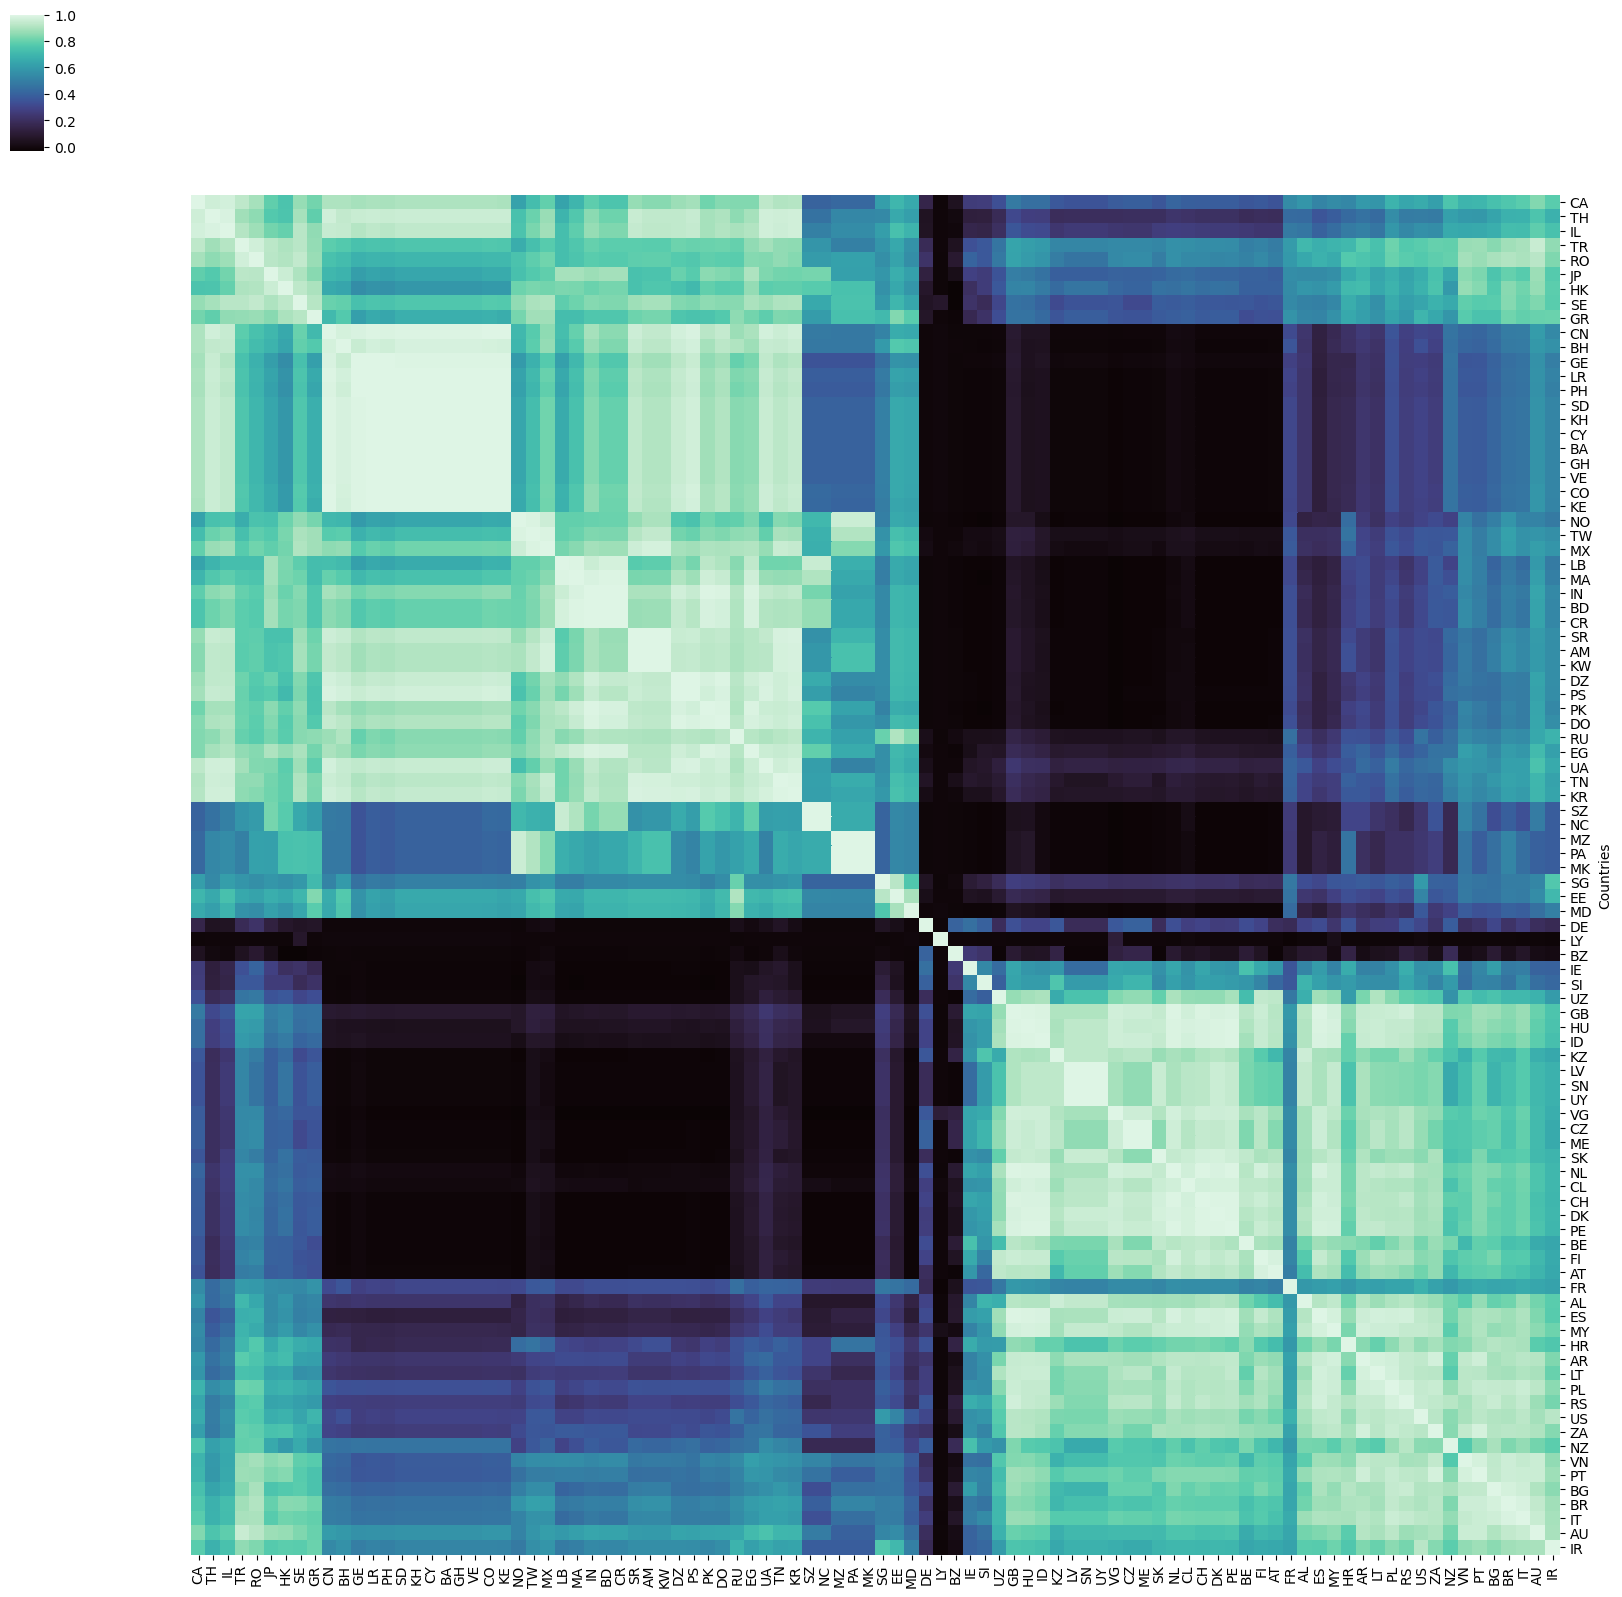

In [189]:
g = sns.clustermap(correl_matrix,figsize=(20,20),cmap="mako")
g.ax_row_dendrogram.remove()
g.ax_col_dendrogram.remove()

In [24]:
reorder=g.dendrogram_row.reordered_ind
ordered_countries=[countries[i] for i in reorder]
print(ordered_countries)

['CA', 'TH', 'IL', 'TR', 'RO', 'JP', 'HK', 'SE', 'GR', 'CN', 'BH', 'GE', 'LR', 'PH', 'SD', 'KH', 'CY', 'BA', 'GH', 'VE', 'CO', 'KE', 'NO', 'TW', 'MX', 'LB', 'MA', 'IN', 'BD', 'CR', 'SR', 'AM', 'KW', 'DZ', 'PS', 'PK', 'DO', 'RU', 'EG', 'UA', 'TN', 'KR', 'SZ', 'NC', 'MZ', 'PA', 'MK', 'SG', 'EE', 'MD', 'DE', 'LY', 'BZ', 'IE', 'SI', 'UZ', 'GB', 'HU', 'ID', 'KZ', 'LV', 'SN', 'UY', 'VG', 'CZ', 'ME', 'SK', 'NL', 'CL', 'CH', 'DK', 'PE', 'BE', 'FI', 'AT', 'FR', 'AL', 'ES', 'MY', 'HR', 'AR', 'LT', 'PL', 'RS', 'US', 'ZA', 'NZ', 'VN', 'PT', 'BG', 'BR', 'IT', 'AU', 'IR']


In [38]:
print(ordered_countries.index('KR'))
print(ordered_countries.index('IE'))

41
53


In [37]:
cluster1=ordered_countries[:42]
print(cluster1)

['CA', 'TH', 'IL', 'TR', 'RO', 'JP', 'HK', 'SE', 'GR', 'CN', 'BH', 'GE', 'LR', 'PH', 'SD', 'KH', 'CY', 'BA', 'GH', 'VE', 'CO', 'KE', 'NO', 'TW', 'MX', 'LB', 'MA', 'IN', 'BD', 'CR', 'SR', 'AM', 'KW', 'DZ', 'PS', 'PK', 'DO', 'RU', 'EG', 'UA', 'TN', 'KR']


In [40]:
cluster2=ordered_countries[53:]
print(cluster2)

['IE', 'SI', 'UZ', 'GB', 'HU', 'ID', 'KZ', 'LV', 'SN', 'UY', 'VG', 'CZ', 'ME', 'SK', 'NL', 'CL', 'CH', 'DK', 'PE', 'BE', 'FI', 'AT', 'FR', 'AL', 'ES', 'MY', 'HR', 'AR', 'LT', 'PL', 'RS', 'US', 'ZA', 'NZ', 'VN', 'PT', 'BG', 'BR', 'IT', 'AU', 'IR']


In [151]:
continent=pd.read_csv('country_continent.csv',keep_default_na=False, na_values=['_'])
continent=continent.set_index('iso 3166 country')['continent code'].to_dict()
continent

{'A1': '--',
 'A2': '--',
 'AD': 'EU',
 'AE': 'AS',
 'AF': 'AS',
 'AG': 'NA',
 'AI': 'NA',
 'AL': 'EU',
 'AM': 'AS',
 'AN': 'NA',
 'AO': 'AF',
 'AP': 'AS',
 'AQ': 'AN',
 'AR': 'SA',
 'AS': 'OC',
 'AT': 'EU',
 'AU': 'OC',
 'AW': 'NA',
 'AX': 'EU',
 'AZ': 'AS',
 'BA': 'EU',
 'BB': 'NA',
 'BD': 'AS',
 'BE': 'EU',
 'BF': 'AF',
 'BG': 'EU',
 'BH': 'AS',
 'BI': 'AF',
 'BJ': 'AF',
 'BL': 'NA',
 'BM': 'NA',
 'BN': 'AS',
 'BO': 'SA',
 'BR': 'SA',
 'BS': 'NA',
 'BT': 'AS',
 'BV': 'AN',
 'BW': 'AF',
 'BY': 'EU',
 'BZ': 'NA',
 'CA': 'NA',
 'CC': 'AS',
 'CD': 'AF',
 'CF': 'AF',
 'CG': 'AF',
 'CH': 'EU',
 'CI': 'AF',
 'CK': 'OC',
 'CL': 'SA',
 'CM': 'AF',
 'CN': 'AS',
 'CO': 'SA',
 'CR': 'NA',
 'CU': 'NA',
 'CV': 'AF',
 'CX': 'AS',
 'CY': 'AS',
 'CZ': 'EU',
 'DE': 'EU',
 'DJ': 'AF',
 'DK': 'EU',
 'DM': 'NA',
 'DO': 'NA',
 'DZ': 'AF',
 'EC': 'SA',
 'EE': 'EU',
 'EG': 'AF',
 'EH': 'AF',
 'ER': 'AF',
 'ES': 'EU',
 'ET': 'AF',
 'EU': 'EU',
 'FI': 'EU',
 'FJ': 'OC',
 'FK': 'SA',
 'FM': 'OC',
 'FO': 'EU',

In [160]:
continent_c1=[continent[i] for i in cluster1]
continent_c2=[continent[i] for i in cluster2]

In [173]:
from collections import Counter

con_count_c1=Counter(continent_c1)
con_count_c2=Counter(continent_c2)

print("number of countries in each continent in cluster 1: ",con_count_c1)
print("number of countries in each continent in cluster 2: ",con_count_c2)

number of countries in each continent in cluster 1:  Counter({'AS': 19, 'EU': 8, 'AF': 8, 'NA': 4, 'SA': 3})
number of countries in each continent in cluster 2:  Counter({'EU': 24, 'AS': 6, 'SA': 5, 'AF': 2, 'NA': 2, 'OC': 2})


In [155]:
19/len(cluster1)

0.4523809523809524

In [156]:
24/len(cluster2)

0.5853658536585366

### spread of malware

In [41]:
data_cluster1=data_withcountry[data_withcountry['Country'].isin(cluster1)]
data_cluster2=data_withcountry[data_withcountry['Country'].isin(cluster2)]

In [190]:
#count the tags occurrence
tag_count_cluster1=data_cluster1.groupby(['tags']).count()['id']
tag_count_cluster1=tag_count_cluster1.to_frame(name='count').reset_index()
tag_count_cluster1=tag_count_cluster1.sort_values('count',ascending=False)
tag_count_cluster1=tag_count_cluster1[tag_count_cluster1['count']>50]
tag_count_cluster1

,tags,count
38,elf,73130
20,Mozi,46211
3,32-bit,29635
53,mips,29038
32,arm,595
39,emotet,333
48,heodo,322
23,None,278
37,doc,252
42,epoch2,172


In [191]:
#count the tags occurrence
tag_count_cluster2=data_cluster2.groupby(['tags']).count()['id']
tag_count_cluster2=tag_count_cluster2.to_frame(name='count').reset_index()
tag_count_cluster2=tag_count_cluster2.sort_values('count',ascending=False)
tag_count_cluster2=tag_count_cluster2[tag_count_cluster2['count']>50]
tag_count_cluster2

,tags,count
76,emotet,2631
88,heodo,2527
72,doc,2032
75,elf,1759
79,epoch2,1253
78,epoch1,805
82,exe,798
80,epoch3,547
32,Mozi,398
2,32-bit,392


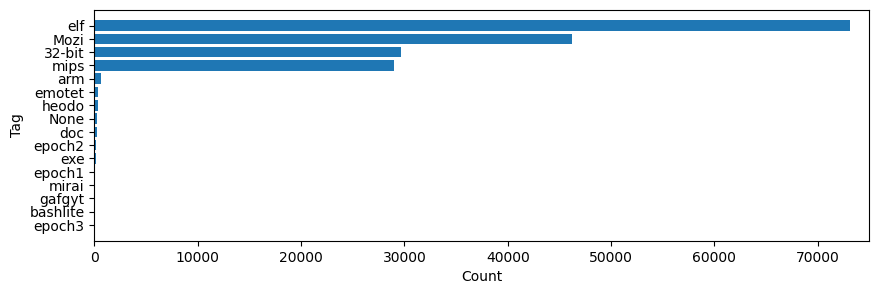

In [196]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,3))

y_pos = np.arange(len(tag_count_cluster1))

ax.barh(y_pos, tag_count_cluster1['count'])
ax.set_yticks(y_pos)
ax.set_yticklabels(tag_count_cluster1['tags'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_ylabel('Tag')
ax.set_xlim(0,75000)

plt.show()

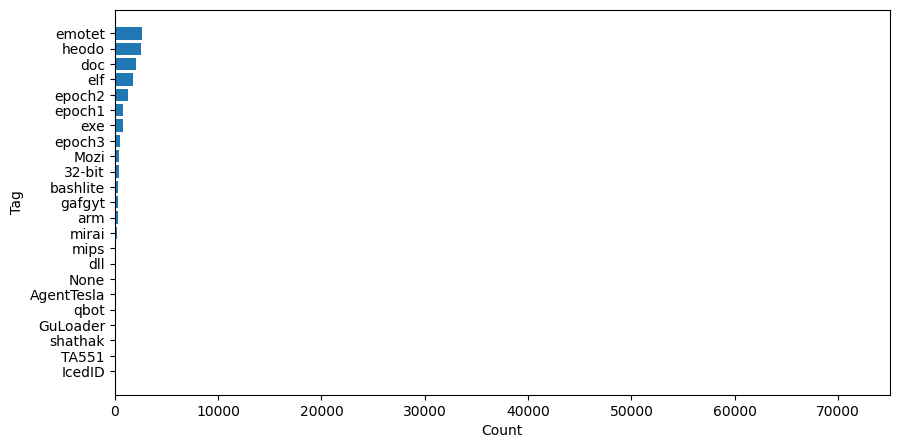

In [195]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10,5))

y_pos = np.arange(len(tag_count_cluster2))

ax.barh(y_pos, tag_count_cluster2['count'])
ax.set_yticks(y_pos)
ax.set_yticklabels(tag_count_cluster2['tags'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_ylabel('Tag')
ax.set_xlim(0,75000)

plt.show()